In [39]:
#source: https://arch.readthedocs.io/en/latest/univariate/introduction.html
import datetime as dt
import pandas as pd
import pandas_datareader as web
from arch import arch_model
import matplotlib.pyplot as plt
import numpy as np

<h1>Modelo GARCH </h1>
Modelo básico:
$$ r_{t} = \mu + \epsilon_{t}$$
$$\epsilon_{t} = \sigma_{t} e_{t}$$
$$\sigma^{2}_{t} = \omega + \alpha \epsilon^{2}_{t-1} + \beta \sigma^{2}_{t-1}$$
Um modelo completo tem os três componentes:


In [2]:
start = dt.datetime(2000,1, 1)
end = dt.datetime(2014,1,1)
sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)

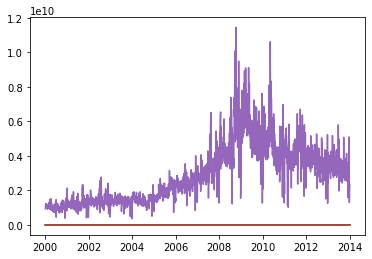

In [7]:
plt.plot(sp500)

In [4]:
returns = 100 * sp500['Adj Close'].pct_change().dropna()

In [5]:
returns

Date
2000-01-04   -3.834467
2000-01-05    0.192218
2000-01-06    0.095568
2000-01-07    2.709040
2000-01-10    1.118997
                ...   
2013-12-24    0.291575
2013-12-26    0.474553
2013-12-27   -0.033658
2013-12-30   -0.017925
2013-12-31    0.395968
Name: Adj Close, Length: 3520, dtype: float64

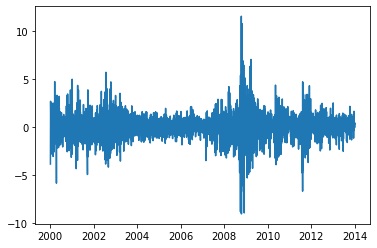

In [6]:
plt.plot(returns)

In [9]:
am = arch_model(returns)
print(am)
res = am.fit()

Constant Mean(constant: yes, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution)
Iteration:      1,   Func. Count:      6,   Neg. LLF: 68805887221245.25
Iteration:      2,   Func. Count:     15,   Neg. LLF: 992324913.2402544
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5194.44960224228
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5190.7424795816505
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5191.570250130128
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5150.829244381318
Iteration:      7,   Func. Count:     46,   Neg. LLF: 6474.500215378861
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5143.161838482249
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5141.392119876381
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5141.390235766463
Iteration:     11,   Func. Count:     69,   Neg. LLF: 5141.390230505602
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5141.39023050684
Optimization terminated su

In [12]:
am = arch_model(returns, mean='ARX') #mean = ‘Constant’, ‘Zero’, ‘LS’, ‘AR’, ‘ARX’, ‘HAR’ and ‘HARX’
print(am)
res = am.fit()

AR(constant: yes, lags: none, no. of exog: 0, volatility: GARCH(p: 1, q: 1), distribution: Normal distribution)
Iteration:      1,   Func. Count:      6,   Neg. LLF: 68805887221245.25
Iteration:      2,   Func. Count:     15,   Neg. LLF: 992324913.2402544
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5194.44960224228
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5190.7424795816505
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5191.570250130128
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5150.829244381318
Iteration:      7,   Func. Count:     46,   Neg. LLF: 6474.500215378861
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5143.161838482249
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5141.392119876381
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5141.390235766463
Iteration:     11,   Func. Count:     69,   Neg. LLF: 5141.390230505602
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5141.39023050684
Optimization terminated s

In [24]:
#print(res.summary())
res

                           AR - GARCH Model Results                           
Dep. Variable:              Adj Close   R-squared:                      -0.001
Mean Model:                        AR   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -5141.39
Distribution:                  Normal   AIC:                           10290.8
Method:            Maximum Likelihood   BIC:                           10315.4
                                        No. Observations:                 3520
Date:                Sun, Jan 03 2021   Df Residuals:                     3516
Time:                        13:12:55   Df Model:                            4
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
Const          0.0531  1.487e-02      3.569  3.581e-04 [2.

In [11]:
#ou, fazendo por partes:


"""
from arch import ConstantMean, GARCH, Normal

am = ConstantMean(returns)
am.volatility = GARCH(1, 0, 1)
am.distribution = Normal()
res = am.fit()
print(res.summary())

"""

'\nfrom arch import ConstantMean, GARCH, Normal\n\nam = ConstantMean(returns)\nam.volatility = GARCH(1, 0, 1)\nam.distribution = Normal()\nres = am.fit()\nprint(res.summary())\n\n'